In [1]:
import glob
from pandas import DataFrame as df
import numpy as np
import datetime

In [2]:
start=datetime.datetime.now()

In [2]:
items=glob.glob(r'..\PlantVillage-Dataset\raw\grayscale\Grape*\*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('\\', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('\\', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.head()

,Disease,Image Path
0,Black_rot,..\PlantVillage-Dataset\raw\grayscale\Grape___...
1,Black_rot,..\PlantVillage-Dataset\raw\grayscale\Grape___...
2,Black_rot,..\PlantVillage-Dataset\raw\grayscale\Grape___...
3,Black_rot,..\PlantVillage-Dataset\raw\grayscale\Grape___...
4,Black_rot,..\PlantVillage-Dataset\raw\grayscale\Grape___...


In [3]:
X=data.drop(['Disease'],axis=1)
y=data['Disease']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [5]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [8]:
from tqdm import tqdm
img_train=[]
for image in tqdm(X_train['Image Path']):
    img_train.append(cv2.imread(image,1))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2436/2436 [00:12<00:00, 195.32it/s]


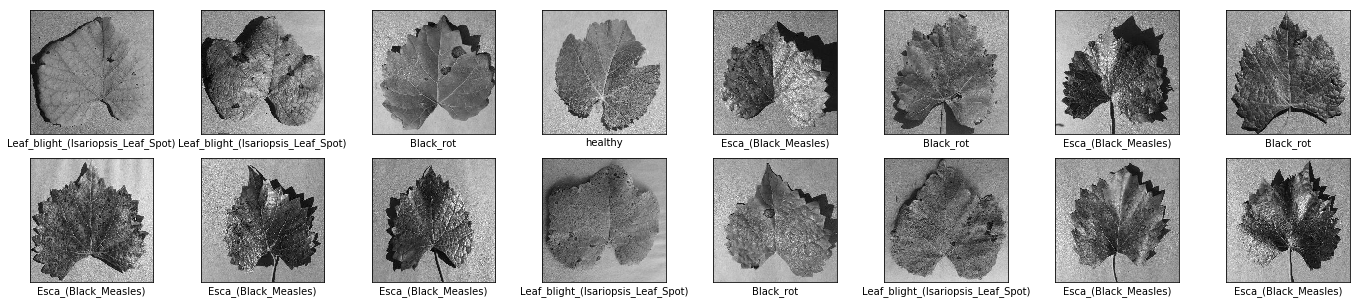

In [10]:
plt.figure(figsize=(24,5))
i=0
for img in img_train[0:16]:
  plt.subplot(2,8,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.xlabel(y_train.iloc[i])
  i+=1
plt.show()

In [9]:
img_test=[]
for image in X_test['Image Path']:
    img_test.append(cv2.imread(image,1))

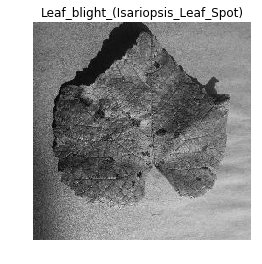

In [10]:
imgplot=plt.imshow(cv2.cvtColor(img_test[0], cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(y_test.iloc[0])
plt.show()

In [11]:
img_train=np.array(img_train)
img_test=np.array(img_test)

In [12]:
train=img_train
train.shape

(2721, 256, 256, 3)

In [13]:
train.resize(train.shape[0],train.shape[1]*train.shape[2]*train.shape[3])
train.shape

(2721, 196608)

In [14]:
test=img_test
test.shape

(1341, 256, 256, 3)

In [15]:
test.resize(test.shape[0],test.shape[1]*test.shape[2]*test.shape[3])
test.shape

(1341, 196608)

In [16]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [17]:
lr=LogisticRegression(class_weight='balanced')

In [18]:
lr.fit(train,y_train)

C:\Users\ssadangi\Documents\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ssadangi\Documents\Softwares\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [19]:
import pickle
pickle.dump(lr, open('Logistic_Regression_Baseline_Grayscale.sav', 'wb'))

In [20]:
#lr = pickle.load(open('Logistic_Regression_Baseline.sav', 'rb'))

In [21]:
preds=lr.predict(test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

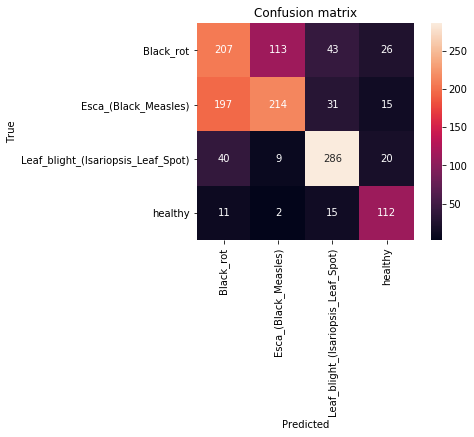

In [23]:
import seaborn as sns
label=['Black_rot','Esca_(Black_Measles)','Leaf_blight_(Isariopsis_Leaf_Spot)','healthy']
sns.heatmap(confusion_matrix(y_test,preds),annot=True,square=True,fmt='g',xticklabels=label,yticklabels=label)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [24]:
print(classification_report(preds,y_test))

                                    precision    recall  f1-score   support

                         Black_rot       0.53      0.45      0.49       455
              Esca_(Black_Measles)       0.47      0.63      0.54       338
Leaf_blight_(Isariopsis_Leaf_Spot)       0.81      0.76      0.78       375
                           healthy       0.80      0.65      0.72       173

                         micro avg       0.61      0.61      0.61      1341
                         macro avg       0.65      0.62      0.63      1341
                      weighted avg       0.63      0.61      0.61      1341



In [25]:
print(datetime.datetime.now()-start)

18:26:00.657769
